### Micaela Kenigsberg y Gal Rubel - 4 TIC B

In [1]:
import pandas as pd #Incluimos la libreria pandas
import matplotlib.pyplot as plt  #Incluimos la libreria para poder graficar
import seaborn as sns #Incluimos la libreria para poder graficar
df = pd.read_csv("data.csv") #Importamos la base de datos
bank = df["Bankrupt?"]
for i in range(20,58):
    df = df.drop(df.columns[i], axis=1) 
for i in range(29):
    df = df.drop(df.columns[i], axis=1) 
for i in range(15):
    df = df.drop(df.columns[i], axis=1) 
df["Bankruptcy"] = bank #La columna que antes era "Bankrupt?" ahora es "Bankruptcy"
print(df.columns, len(df.columns))

Index([' ROA(B) before interest and depreciation after tax',
       ' Pre-tax net Interest Rate', ' Operating Expense Rate',
       ' Tax rate (A)', ' Persistent EPS in the Last Four Seasons',
       ' Regular Net Profit Growth Rate', ' Interest Expense Ratio',
       ' Net profit before tax/Paid-in capital', ' Revenue per person',
       ' Cash/Current Liability', ' Long-term Liability to Current Assets',
       ' Cash Flow to Sales', ' Cash Flow to Equity', ' Liability to Equity',
       'Bankruptcy'],
      dtype='object') 15


La base de datos tenía 96 columnas, por lo que decidimos dejarle solo 15. El problema fue que al sacar columnas sacaba la primera que era la única categórica, por eso tuvimos que agregarla nuevamente al final.

- [x] 1

- [x] 2

- [x] 3

- [x] 4

- [x] 5

- [x] 6

- [x] 7

- [ ] 8

- [x] bonus 

2. Realizar un análisis exploratorio de los datos. Se recomienda utilizar gráficos para visualizar la distribución de los datos y la correlación entre los atributos. Se recomienda utilizar la librería seaborn para realizar los gráficos.

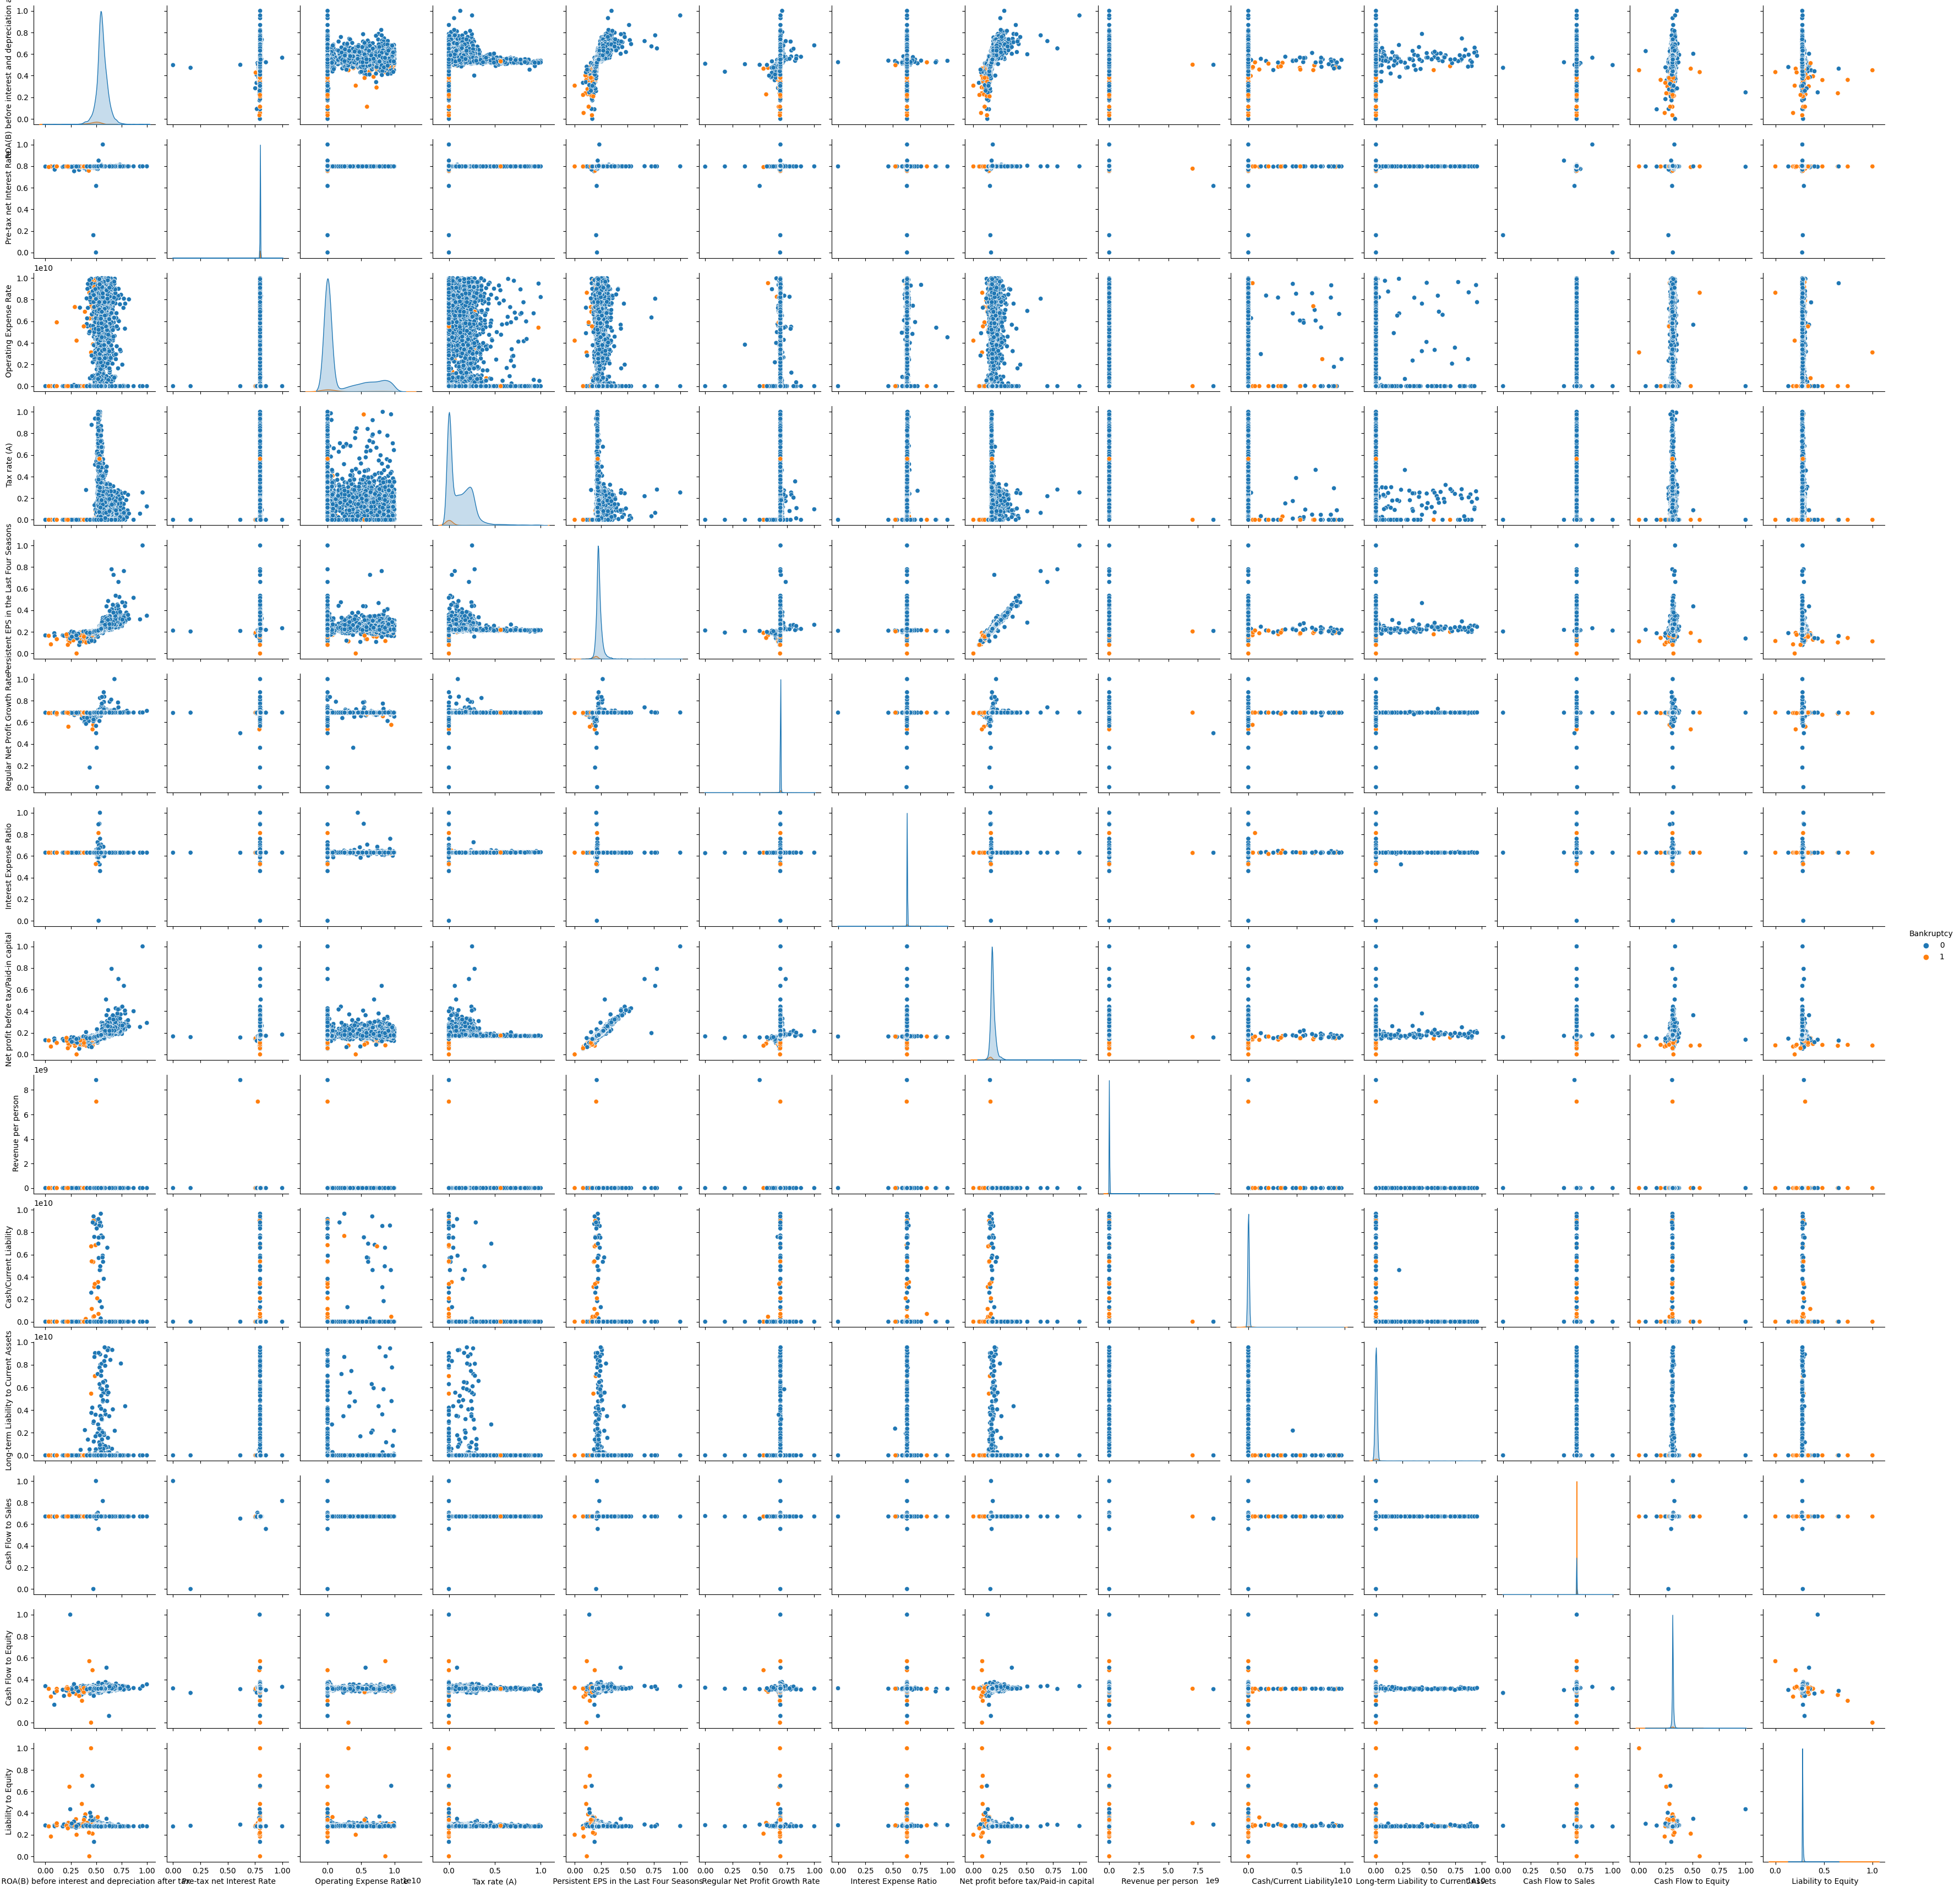

In [2]:
sns.pairplot(df, hue="Bankruptcy")


Acá hicimos un análisis en el que se comparar todos los datos , por eso hay 196 gráficos (14X14=196). Podemos observar como  si un banco esta quebrado ciertos valores suelen ser iguales como "ROA(B) before interest and depreciation after tax" mientras que otros como "Revenue per person", donde no se puede ver un patrón claro al ojo, es por esto que al graficar múltiples valores es más fácil establecer relaciones entre si iba a quebrar con 15 atributos antes de con solo uno.

3. Como resultado del análisis exploratorio, seleccionar un atributo categórico y un atributo numérico para realizar un modelo de clasificación. Se recomienda utilizar la función LabelEncoder de SciKit-Learn para convertir el atributo categórico a numérico.

"Bankruptcy" va a ser el atributo categórico y " ROA(B) before interest and depreciation after tax" el atributo numérico

4. Realizar una partición de los datos en conjuntos de entrenamiento y test. La proporción con la cual hacen esta partición es libre. Se recomienda utilizar la función train_test_split de SciKit-Learn.

In [3]:
from sklearn.model_selection import train_test_split #Importamos
test_size = 0.4 #Definimos un 40% para prueba y 60% para entrenamiento
X = df.drop("Bankruptcy", axis=1) #Queremos predecir la variable "Bankruptcy"
y = df["Bankruptcy"] #Va a predecir si hubo bankruptcy o no
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size) #X_train y y_train tienen los datos para entrenamiento y X_test y y_test tienen los datos para prueba


NameError: name 'df' is not defined

5. Para el atributo numérico a predecir seleccionado:

In [4]:
#Separamos los datos para train y test
from sklearn.model_selection import train_test_split #Importamos
from sklearn.linear_model import LinearRegression #Importamos más cosas
from sklearn.tree import DecisionTreeRegressor #Importamos más cosas 
test_size = 0.2 #Definimos un 20% para prueba y 80% para entrenamiento
X = df.drop(" ROA(B) before interest and depreciation after tax", axis=1) #Queremos predecir la variable " ROA(B) before interest and depreciation after tax"
y = df[" ROA(B) before interest and depreciation after tax"] #Va a predecir el ROA(B) before interest and depreciation after tax
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size) #X_train y y_train tienen los datos para entrenamiento y X_test y y_test tienen los datos para prueba

KeyError: "[' ROA(C) before interest and depreciation before interest'] not found in axis"

- Realizar un modelo de regresión lineal utilizando la clase LinearRegression de SciKit-Learn.

In [5]:
#Creamos el modelo
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test) #Realizamos las predicciones

newDF = pd.DataFrame() #Nuevo dataFrame
newDF["y"] = y_test #Columna con los datos que ya se
newDF["yPred"] = y_pred #Columna con lo que predijó de cada dato

newDF.head(10)

,y,yPred
948,0.517533,0.492544
2764,0.542856,0.545114
2262,0.554045,0.549898
187,0.546389,0.544287
2041,0.519032,0.498700
5106,0.608973,0.571395
1576,0.467637,0.495651
1470,0.566840,0.558234
1107,0.551475,0.542840
3970,0.574067,0.575961


- Realizar un modelo de Árbol de Decisión utilizando la clase DecisionTreeRegressor de SciKit-Learn. Seleccionar hiperparámetros que les parezca mejoren el modelo.

In [6]:
#Creamos el modelo
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test) #Realizamos las predicciones

newDF = pd.DataFrame() #Nuevo dataFrame
newDF["y"] = y_test #Columna con los datos que ya se
newDF["yPred"] = y_pred #Columna con lo que predijó de cada dato

newDF.head(10)


,y,yPred
948,0.517533,0.493121
2764,0.542856,0.544087
2262,0.554045,0.539697
187,0.546389,0.567643
2041,0.519032,0.517480
5106,0.608973,0.630548
1576,0.467637,0.473526
1470,0.566840,0.552492
1107,0.551475,0.605172
3970,0.574067,0.556079


Responder: ¿Qué formas tienen de evaluar los resultados de cada árbol de decisión? ¿Como eligen "el mejor árbol"? ¿Como se comparan los resultados de los modelos de regresión lineal y de árbol de decisión?

En los árbol de decisión se pueden evaluar los resultados y comparar cuantos errores hubo y de esa manera saber que tan acertado fue un modelo. Además, para elegir el mejor se puede comparar con otros árboles para encontrar la configuración que tenga menos errores. Los modelos de regresión lineal y árbol de decisión se compraran viendo cual estuvo menos errado y le acertó mejor a los valores originales. Para este caso, podemos ver como claramente conviene un árbol de decisión ya que se aproxima mejor a los resultados esperados. 

6. Para el atributo categórico a predecir seleccionado


In [7]:
#Separamos los datos para train y test
from sklearn.model_selection import train_test_split #Importamos
from sklearn.linear_model import LogisticRegression #Importamos más cosas
from sklearn.tree import DecisionTreeClassifier #Importamos más cosas
from sklearn.metrics import accuracy_score
test_size = 0.5 #Definimos un 50% para prueba y otro 50% para entrenamiento
X = df.drop("Bankruptcy", axis=1) #Queremos predecir la variable "Bankruptcy"
y = df["Bankruptcy"] #Va a predecir si hubo bankruptcy o no
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size) #X_train y y_train tienen los datos para entrenamiento y X_test y y_test tienen los datos para prueba


NameError: name 'df' is not defined

- Realizar un modelo de clasificación utilizando la clase LogisticRegression de SciKit-Learn.

In [8]:
#Creamos el modelo
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test) #Realizamos las predicciones

#Evaluamos el funcionamiento
accuracy = accuracy_score(y_pred, y_test)

print(f'Accuracy: {accuracy*100}%')

Accuracy: 96.68621700879766%


- Realizar un modelo de clasificación utilizando la clase DecisionTreeClassifier de SciKit-Learn.

In [9]:
#Creamos el modelo
model = DecisionTreeClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test) #Realizamos las predicciones

#Evaluamos el funcionamiento  
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100}%')

Accuracy: 94.80938416422288%


Responder: ¿Qué formas tienen de evaluar los resultados de cada árbol de decisión? ¿Como eligen "el mejor árbol"? ¿Como se comparan los resultados de los modelos de regresión lineal y de árbol de decisión?

En los árbol de decisión se pueden evaluar los resultados y ver el nivel de "Accuracy" para de esa manera saber que tan acertado fue un modelo. Además, para elegir el mejor se puede comparar con otros árboles para encontrar la configuración que tenga una mejor predicción. Los modelos de regresión lineal y árbol de decisión se compraran viendo cual tuvo mayor nivel de accuracy, es decir, cual estuvo más cerca de las predicciones originales. En este caso, la regresión tiene un 96%, lo cual hace que sea mejor que el árbol que tiene 95%.

7. Comparar distintos métodos de validación cruzada. ¿Qué ventajas y desventajas tiene cada uno?

Con K-Fold, donde el dataset se divide en grupos de tamaños parecidos y es entrando con todos los folds menos uno. Es un buen estimativo dado que no se repite el mismo grupo en testing y training, mientras con Repeated K-fold podes iterar muchas más veces haciendo así distintos splits y pudiendo randomizar los datos. Leave one out es una manera más simple donde no se gasta tantos datos porque solo se saca un sample del dataset sin embargo es computacionalmente más caro que K-fold y resulta en un gran número de iteraciones para testear el error. LeavePOut es muy parecido a LeaveOneOut donde se crean posibles sets de testeo y entrenamiento al sacar p samples de la dataset aunque este método crea una superposición. ShuffleSplit es una alternativa a Kfold que permite un control más fino en el número y tamaño de las iteraciones y su subdivisión entre train/test al generar un número independiente de divisiones generado por el usuario, donde primero se mezclan y luego de dividen. 

De estos tipos hay diferentes variaciones, StratifedKfold devuelve sets que contiene aproximadamente el mismo porcentaje de cada clase que en el set completo esto preserva el split original. GroupKFold asegura que el mismo grupo no se repita en ambos sets, esto permite que el modelo no generalize tanto y sea más fácil de encontrar situaciones donde hace overfitting. En conclusión, hay diferentes métodos de cross validación que se pueden usar depende del tipo y tamaño de dataset para no sólo mejorar su precisión sino para evitar situación como el over fitting.


8. Escribir una conclusión sobre el trabajo realizado.

Observamos la gran variación en el nivel  de accuracy dependiendo de cómo dividimos los datos de test y train, cuando queríamos predecir el atributo numérico era esencial poner muchos más datos a para entrenarlo, 80% con 20% de test, mientras que cuando queríamos predecir el atributo categórico hicimos 50% y 50%.Luego de hacer distintos modelos podemos ver que para nuestro dataset que era mayormente numérico, predecía con más precisión el atributo categórico en comparación a los numéricos y el modelo más preciso fue la regresión lógica para predicar el atributo categórico. 


Bonus: Investigar los métodos GridSearch y RandomSearch para la búsqueda de hiperparámetros. Utilizarlos para encontrar los mejores hiperparámetros para los modelos. Para ya sea el atributo categórico como para el numérico, elegir otro modelo de clasificación o regresión que no haya sido utilizado anteriormente. Entrenar el modelo y comparar los resultados con los obtenidos anteriormente.

In [10]:
from sklearn.model_selection import train_test_split #Importamos
from sklearn.model_selection import GridSearchCV #Importamos
from sklearn.tree import DecisionTreeClassifier #Importamos más cosas
from sklearn.metrics import accuracy_score #Importamos más más cosas
test_size = 0.5 #Definimos un 50% para prueba y otro 50% para entrenamiento
X = df.drop("Bankruptcy", axis=1) #Queremos predecir la variable "Bankruptcy"
y = df["Bankruptcy"] #Va a predecir si hubo bankruptcy o no
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size) #X_train y y_train tienen los datos para entrenamiento y X_test y y_test tienen los datos para prueba

params = {
    "max_depth": [3, 4, 5, 6],
    "min_samples_leaf": [1, 2, 3, 4],
} #Hiperparametros

#Crear el modelo
gs = GridSearchCV(
    estimator=DecisionTreeClassifier(), param_grid=params, cv=5
)

gs.fit(X_train, y_train) #Entrenamos el modelo
print(gs.best_params_) #Mostramos los mejores parametros
best_gs = gs.best_estimator_
y_pred = best_gs.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) #Calcular la presición
print(str(accuracy * 100) + "%")

{'max_depth': 3, 'min_samples_leaf': 4}
96.71554252199414%


In [11]:
#Separamos los datos para train y test
from sklearn.model_selection import train_test_split #Importamos
from sklearn.ensemble import RandomForestClassifier #Elegimos usar el "Random Forest Classifier"
from sklearn.metrics import accuracy_score
test_size = 0.5 #Definimos un 50% para prueba y otro 50% para entrenamiento
X = df.drop("Bankruptcy", axis=1) #Queremos predecir la variable "Bankruptcy"
y = df["Bankruptcy"] #Va a predecir si hubo bankruptcy o no
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size) #X_train y y_train tienen los datos para entrenamiento y X_test y y_test tienen los datos para prueba

In [12]:
#Creamos el modelo
rf_classifier = RandomForestClassifier(max_depth=3, min_samples_leaf=1)
rf_classifier.fit(X_train, y_train)  #Entrenamos al modelo
y_pred = rf_classifier.predict(X_test) #Realizamos las predicciones
accuracy = accuracy_score(y_test, y_pred) #Evaluamos el funcionamiento  
print(f'Accuracy: {accuracy * 100}%')


Accuracy: 96.9208211143695%


Obtuvimos un resultado de aproximadamente 97% que comparado con los dos anteriores modelos es el más alto, por lo que podemos concluir en que buscando los hiperparámetros pudimos conseguir un mayor nivel de exactitud. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=352e4a8f-2205-41eb-8292-63d9b1252d20' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>